In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression as LR

In [3]:
df=pd.read_csv("multiple_linear_regression (2).csv")
df

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [5]:
x=df.iloc[:,0:3]
x

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
x.shape

(200, 3)

In [7]:
y=df.iloc[:,3]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Target, Length: 200, dtype: float64

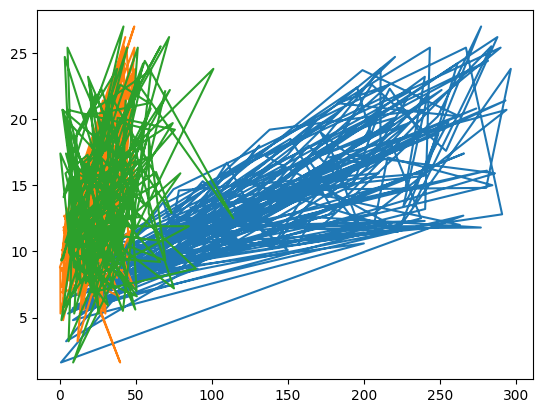

In [8]:
plt.plot(x,y)

In [9]:
lr=LR()

In [10]:
from sklearn.model_selection import train_test_split as tr

In [11]:
x_train,x_test,y_train,y_test=tr(x,y,random_state=42)

In [12]:
x_train.shape

(150, 3)

In [13]:
x_test.shape

(50, 3)

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
lr.coef_

array([0.04543356, 0.19145654, 0.00256809])

In [16]:
lr.intercept_

2.7783034602452865

In [17]:
prediction=lr.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error as ms

In [19]:
cost=ms(y_test,prediction)
cost

2.880023730094191

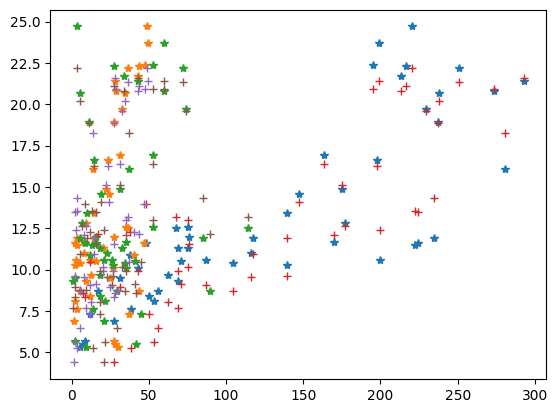

In [20]:
plt.plot(x_test,y_test,"*")
plt.plot(x_test,prediction,"+")

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test,prediction)

0.8935163320163658

In [23]:
import statsmodels.api as sn
import statsmodels.tsa.api as smt

In [24]:
x_with_c=sn.add_constant(x_train)

In [25]:
x_with_c

,const,Feature 1,Feature 2,Feature 3
114,1.0,78.2,46.8,34.5
173,1.0,168.4,7.1,12.8
5,1.0,8.7,48.9,75.0
126,1.0,7.8,38.9,50.6
117,1.0,76.4,0.8,14.8
...,...,...,...,...
106,1.0,25.0,11.0,29.7
14,1.0,204.1,32.9,46.0
92,1.0,217.7,33.5,59.0
179,1.0,165.6,10.0,17.6


In [26]:
model=sn.OLS(y_train,x_with_c)

In [27]:
result=model.fit()

In [28]:
result.params

const        2.778303
Feature 1    0.045434
Feature 2    0.191457
Feature 3    0.002568
dtype: float64

In [29]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.02e-71
Time:                        16:33:26   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.0

In [30]:
x_test_c=sn.add_constant(x_test)

In [31]:
y_pred=result.predict(x_test_c)

In [32]:
residual=y_test-y_pred
residual

95     0.516518
15     1.475650
30    -0.214954
158   -3.190700
128    2.523095
115   -0.426681
69     1.196907
170    1.081870
174   -2.067321
45    -0.222386
66     0.575059
182    2.200756
165   -2.401199
78    -3.472335
186    0.713345
177   -0.394853
56    -3.096216
152    0.346621
82     1.130519
68     0.042466
124    0.120096
16    -0.658770
148   -1.351037
93     0.848580
65     1.603924
60     2.453131
84     0.902199
67     1.490488
125    1.534190
132   -2.672956
9     -1.808159
18     1.405839
55     2.272923
75    -3.442369
150   -2.187769
104    0.518853
135   -2.393030
137   -0.099877
164    0.968605
76     2.512784
79     1.417866
197    0.182975
38     0.161481
24     1.631837
122   -1.854978
195    2.342306
29     1.346005
19     0.504472
143    1.689702
86     0.448972
dtype: float64

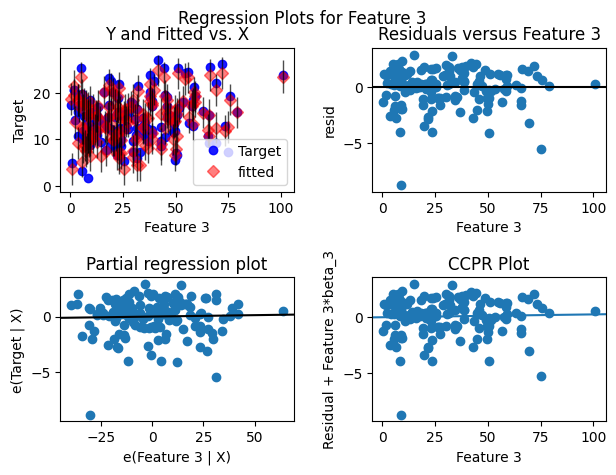

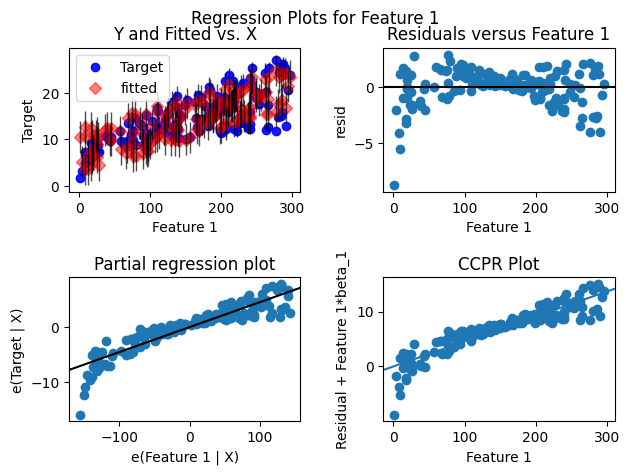

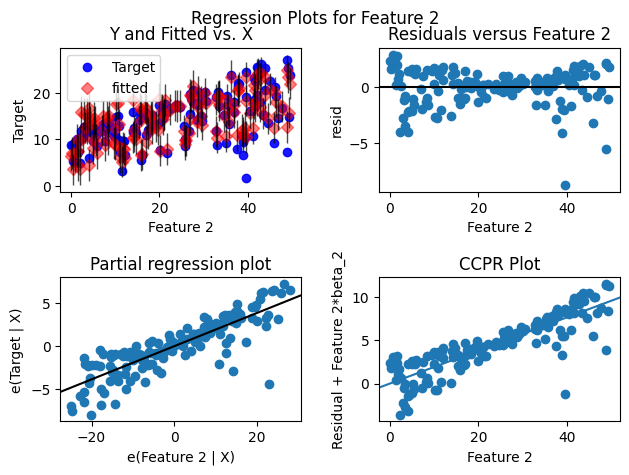

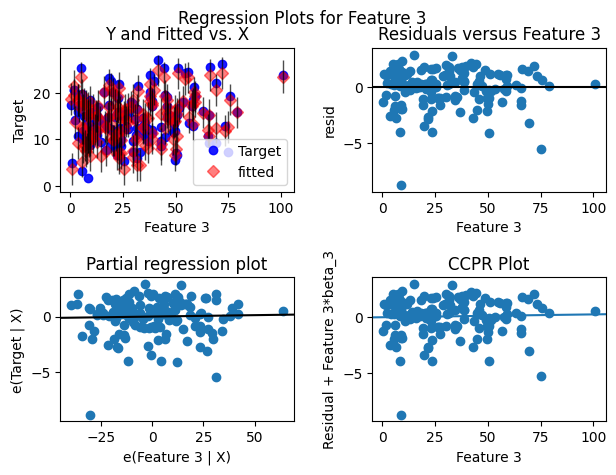

In [33]:
sn.graphics.plot_regress_exog(result,"Feature 1")
sn.graphics.plot_regress_exog(result,"Feature 2")
sn.graphics.plot_regress_exog(result,"Feature 3")

In [34]:
residual=y_test-prediction

In [35]:
residual

95     0.516518
15     1.475650
30    -0.214954
158   -3.190700
128    2.523095
115   -0.426681
69     1.196907
170    1.081870
174   -2.067321
45    -0.222386
66     0.575059
182    2.200756
165   -2.401199
78    -3.472335
186    0.713345
177   -0.394853
56    -3.096216
152    0.346621
82     1.130519
68     0.042466
124    0.120096
16    -0.658770
148   -1.351037
93     0.848580
65     1.603924
60     2.453131
84     0.902199
67     1.490488
125    1.534190
132   -2.672956
9     -1.808159
18     1.405839
55     2.272923
75    -3.442369
150   -2.187769
104    0.518853
135   -2.393030
137   -0.099877
164    0.968605
76     2.512784
79     1.417866
197    0.182975
38     0.161481
24     1.631837
122   -1.854978
195    2.342306
29     1.346005
19     0.504472
143    1.689702
86     0.448972
Name: Target, dtype: float64

In [37]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
Name: Target, dtype: float64

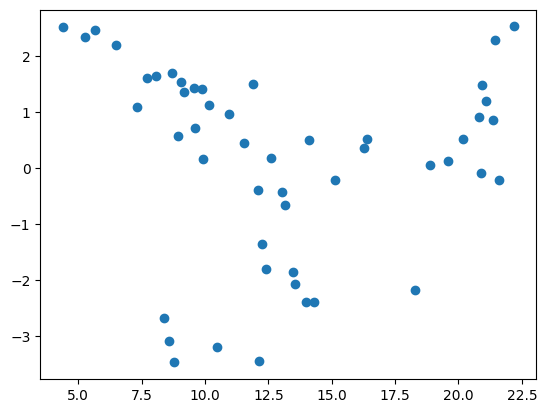

In [38]:
plt.scatter(y_pred,residual)

In [39]:
import seaborn as sns

<Axes: >

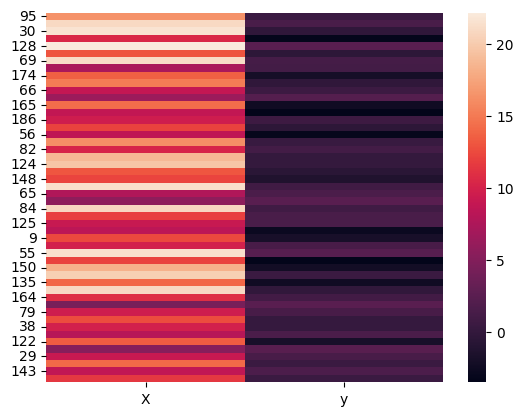

In [48]:
df_heat=pd.DataFrame({"X":y_pred,"y":residual})
sns.heatmap(df_heat)

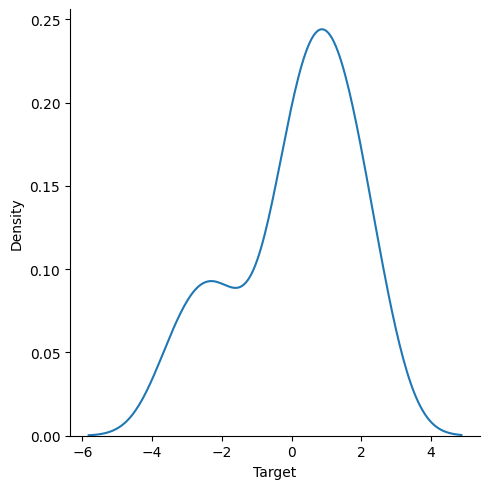

In [50]:
sns.displot(residual,kind='kde')